<a href="https://colab.research.google.com/github/cxmedeiros/ProjetoEletromag/blob/main/ProjetoEletromag2024_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribuição de carga em um anel quadrado com potencial fixo:

# 💻 Trabalho computacional da cadeira de Eletromagnetismo!

**Integrantes:**

*   Camila Xavier (cxm)
*   Mário da Mota (mmln)
*   Pedro Fernandes (pfbc2)




## Problema:

Um anel metálico quadrado de lado L é mantida a um potencial Vo, como mostrado abaixo. Assuma que o meio seja espaço livre. Aplique o método dos momentos para determinar a distribuição superficial de carga na placa. Para tanto divida cada lado L em N segmentos iguais.

Dica: defina N como múltiplo de 4, de forma que L/4 contenha um número inteiro de segmentos.

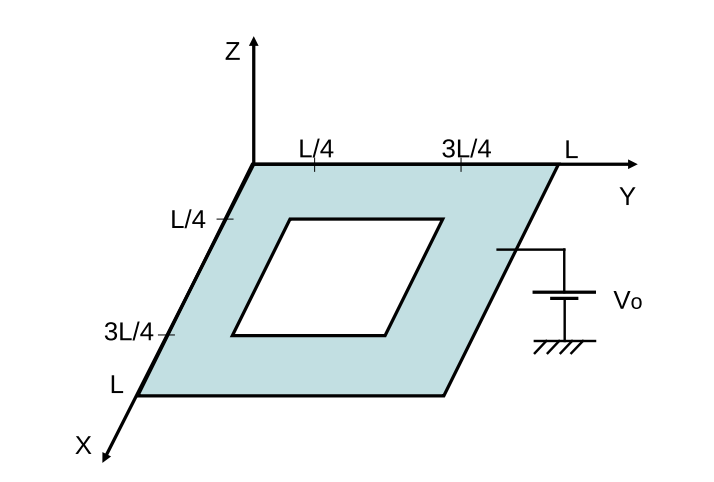

### Passos:

1. Aplique o Método dos Momentos ao problema, usando pulsos como funções de base em cada sub-domínio (quadrados de lados L/N), e impondo as condições de contorno em pontos específicos do anel. Se usar outra opção de funções de base e de teste me avise! Determine as expressões para os elementos das matrizes de impedância e de tensão do método dos momentos.

2. Para o caso em que L = 40 cm, e V0 = 10 V, mostre as matrizes de impedância e tensão para um valor
de N (você escolhe).

3. Resolva o sistema linear para um valor de N específico que você escolheu acima. Determine as amplitudes dos pulsos, e obtenha uma aproximação para a distribuição de carga superficial na placa. Plote o resultado.

4. Resolva o problema e plote a distribuição superficial de carga para diferentes valores de N. Comente os resultados.

5. Determine a carga total na placa para os diferentes valores de N acima e observe a sua convergência.






### Entregas:

1. Formulação detalhada de cada item;
2. Programas;
3. Resultados numéricos e computacionais.




### 🚨 O Método dos Momentos (MoM) será aplicado para resolver o potencial ao longo do anel metálico quadrado de lado 𝐿, que está mantido a um potencial 𝑉0. Vamos dividir o anel em 𝑁 elementos discretos e usar funções de base do tipo pulso (também chamadas de funções de base constantes por pedaços).

## 1. ‼️ Método dos Momentos para um Anel Quadrado

**1. Equação Integral do Potencial**




O potencial gerado por uma distribuição de carga superficial $$ \sigma(x', y') $$ é dado por:

$$
\phi(x, y) = \frac{1}{4\pi \epsilon_0} \int_S \frac{\sigma(x', y')}{R} dS'
$$

onde:

$$ \sigma(x', y') $$ é a **densidade de carga superficial** no anel.
$$ R = \sqrt{(x - x')^2 + (y - y')^2} $$ é a **distância** entre um ponto de observação $$ (x, y) $$ e um ponto de carga $$ (x', y'). $$



**2. Discretização do Problema**



Dividimos o **anel metálico quadrado** em $$ N $$ segmentos de comprimento $$ \Delta x = L/N $$, com $$ N $$ **múltiplo de 4** para garantir um número inteiro de segmentos por lado.

A carga é aproximada por funções pulso, assumindo que ela é **constante em cada segmento**:

$$
\sigma(x, y) \approx \sum_{i=1}^{N} I_i P_i(x, y)
$$

onde:
$$ I_i $$ representa a **densidade linear de carga** no segmento $$ i. $$
$$ P_i(x, y) $$ são **funções pulso**, assumindo que a carga é **uniforme dentro de cada segmento**.

Assim, cada segmento contribui para o potencial total com a equação:

$$
\phi_j = \sum_{i=1}^{N} Z_{ji} I_i
$$



**3. Sistema Linear do Método dos Momentos**



Impondo a condição de contorno $$ \phi_j = V_0 $$, obtemos o sistema:

$$
\sum_{i=1}^{N} Z_{ji} I_i = V_0, \quad j = 1, 2, \dots, N
$$

onde:

**Matriz de Impedância $$ Z_{ji} $$**

$$
Z_{ji} = \frac{1}{4\pi \epsilon_0} \int_{S_i} \frac{1}{R_{ji}} dS'
$$

com $$ R_{ji} $$ sendo a **distância entre os segmentos $$ i $$ e $$ j. $$**

Para $$ i \neq j, $$ usamos $$ R_{ji} $$ diretamente.
Para $$ i = j, $$ usamos uma **aproximação de autoimpedância** para evitar singularidades:

  $$
  Z_{ii} \approx \frac{2}{\Delta x}
  $$

**Vetor de Tensão $$ V_j $$**

Como o anel está a um potencial fixo $$ V_0, $$ temos simplesmente:

$$
V_j = V_0
$$

A solução do sistema linear fornece a distribuição de carga $$ I_i, $$
que representa a **densidade linear de carga ao longo do anel**.


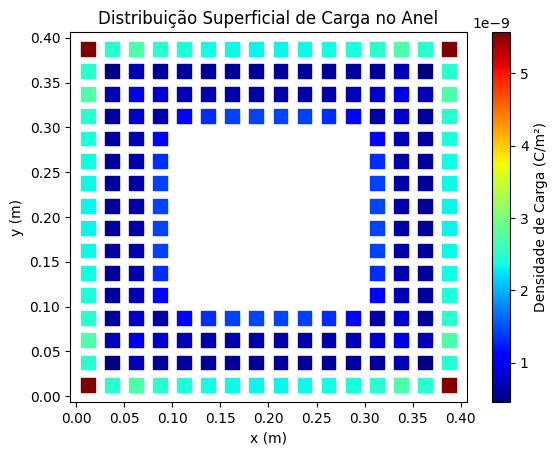

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definições do problema
L = 40e-2  # 40 cm convertido para metros
V0 = 10    # Potencial do anel em volts
N = 16     # Número de subdivisões (múltiplo de 4)

eps0 = 8.854e-12  # Permissividade do espaço livre
delta = L / N  # Tamanho de cada segmento

# Criando as posições dos centros dos subdomínios
subdomains = []
for i in range(N):
    for j in range(N):
        x = (i + 0.5) * delta
        y = (j + 0.5) * delta
        # Verifica se o ponto está no anel
        if not (L/4 <= x <= 3*L/4 and L/4 <= y <= 3*L/4):
            subdomains.append((x, y))

M = len(subdomains)  # Número real de subdomínios
Z = np.zeros((M, M))
V = np.full(M, V0)  # Vetor de tensões

# Cálculo aproximado da matriz de impedância
for i, (xi, yi) in enumerate(subdomains):
    for j, (xj, yj) in enumerate(subdomains):
        if i == j:
            Z[i, j] = delta**2 / (2 * np.pi * eps0 * delta)  # Autoimpedância
        else:
            rij = np.sqrt((xi - xj)**2 + (yi - yj)**2)
            Z[i, j] = delta**2 / (4 * np.pi * eps0 * rij)  # Aproximação

# Resolução do sistema linear
sigma = np.linalg.solve(Z, V)

# Plot da distribuição de carga
x_vals, y_vals = zip(*subdomains)
plt.scatter(x_vals, y_vals, c=sigma, cmap='jet', marker='s', s=100)
plt.colorbar(label='Densidade de Carga (C/m²)')
plt.title('Distribuição Superficial de Carga no Anel')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

## 2. ✏️ Para o caso em que L = 40 cm, e V0 = 10 V, mostre as matrizes de impedância e tensão para um valor de N (você escolhe):

In [ ]:
L = 0.4    # 40 centímetros
N = 80     # 80 = 20 * 4
Vo = 10.0  # potencial de 10V

segmentos_por_lado = N // 4

# Criando 2 arrays de tamanho N preenchidos com 0s
x = np.zeros(N)
y = np.zeros(N)

delta = L / segmentos_por_lado

for i in range(segmentos_por_lado):
    # Base
    x[i] = -L/2 + (i + 0.5) * delta
    y[i] = -L/2
    # Lado direito
    x[i + segmentos_por_lado] = L/2
    y[i + segmentos_por_lado] = -L/2 + (i + 0.5) * delta
    # Topo
    x[i + 2*segmentos_por_lado] = L/2 - (i + 0.5) * delta
    y[i + 2*segmentos_por_lado] = L/2
    # Lado esquerdo
    x[i + 3*segmentos_por_lado] = -L/2
    y[i + 3*segmentos_por_lado] = L/2 - (i + 0.5) * delta

# Criando matriz vazia para preencher com matriz de impedância
Z = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i != j:
            R = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)
            Z[i, j] = 1 / R
        else:
            # Autoimpedância corrigida
            Z[i, j] = 2 / delta

# Vetor de tensão (que será constante por V0 ser constante)
V = np.ones(N) * Vo

# Exibindo as matrizes para a parte 2
np.set_printoptions(precision=3, suppress=True)
print("Matriz de Impedância Z:")
print(Z)
print("\nVetor de Tensão V:")
print(V)


Matriz de Impedância Z:
[[100.     50.     25.    ...  19.612  31.623  70.711]
 [ 50.    100.     50.    ...  17.15   23.57   31.623]
 [ 25.     50.    100.    ...  14.142  17.15   19.612]
 ...
 [ 19.612  17.15   14.142 ... 100.     50.     25.   ]
 [ 31.623  23.57   17.15  ...  50.    100.     50.   ]
 [ 70.711  31.623  19.612 ...  25.     50.    100.   ]]

Vetor de Tensão V:
[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10.]


## 3. ✏️ Resolva o sistema linear para um valor de N específico que você escolheu acima. Determine as amplitudes dos pulsos, e obtenha uma aproximação para a distribuição de carga superficial na placa. Plote o resultado:

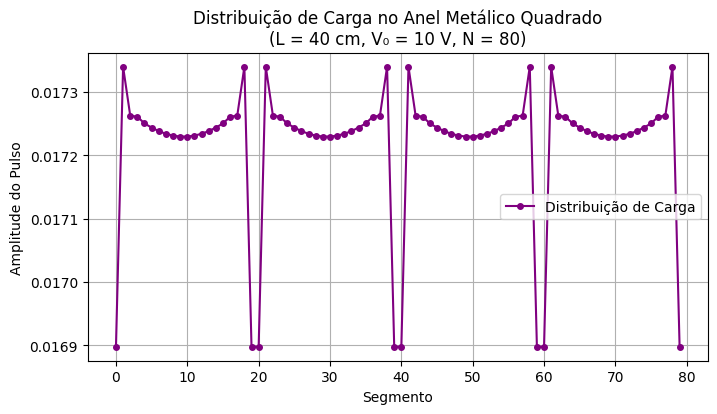

In [ ]:
# Resolvendo o sistema linear para obter as amplitudes dos pulsos
I = np.linalg.solve(Z, V)

# Plotando a distribuição da carga (amplitudes dos pulsos)
plt.figure(figsize=(8, 4))
plt.plot(range(N), I, 'o-', markersize=4, label="Distribuição de Carga", color="purple")
plt.xlabel("Segmento")
plt.ylabel("Amplitude do Pulso")
plt.title(f"Distribuição de Carga no Anel Metálico Quadrado\n(L = 40 cm, V₀ = 10 V, N = {N})")
plt.grid(True)
plt.legend()
plt.show()

## 4. 🧮 Resolva o problema e plote a distribuição superficial de carga para diferentes valores de N. Comente os resultados:

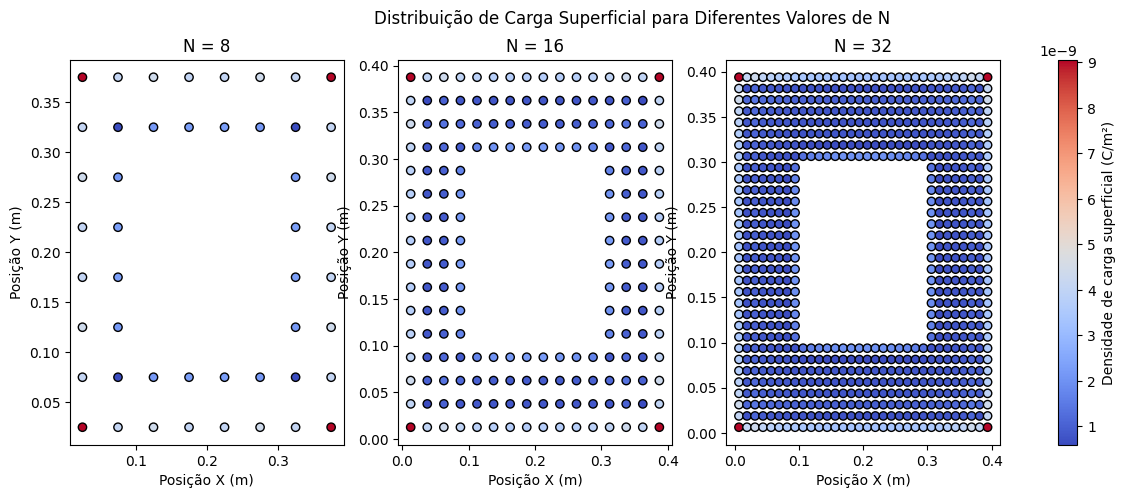

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definições do problema
L = 40e-2  # 40 cm convertido para metros
V0 = 10    # Potencial do anel em volts
Ns = [8, 16, 32]  # Diferentes valores de N para análise

eps0 = 8.854e-12  # Permissividade do espaço livre

# Criar gráficos para diferentes valores de N
fig, axes = plt.subplots(1, len(Ns), figsize=(15, 5))

for idx, N in enumerate(Ns):
    delta = L / N  # Tamanho de cada segmento

    # Criando as posições dos centros dos subdomínios
    subdomains = []
    for i in range(N):
        for j in range(N):
            x = (i + 0.5) * delta
            y = (j + 0.5) * delta
            # Verifica se o ponto está no anel
            if not (L/4 <= x <= 3*L/4 and L/4 <= y <= 3*L/4):
                subdomains.append((x, y))

    M = len(subdomains)  # Número real de subdomínios
    Z = np.zeros((M, M))
    V = np.full(M, V0)  # Vetor de tensões

    # Cálculo aproximado da matriz de impedância
    for i, (xi, yi) in enumerate(subdomains):
        for j, (xj, yj) in enumerate(subdomains):
            if i == j:
                Z[i, j] = delta**2 / (2 * np.pi * eps0 * delta)  # Autoimpedância
            else:
                rij = np.sqrt((xi - xj)**2 + (yi - yj)**2)
                Z[i, j] = delta**2 / (4 * np.pi * eps0 * rij)  # Aproximação

    # Resolver o sistema linear Z * sigma = V
    sigma = np.linalg.solve(Z, V)  # Distribuição de carga superficial

    # Plotar a distribuição de carga para cada N
    ax = axes[idx]
    sc = ax.scatter([x for x, y in subdomains], [y for x, y in subdomains], c=sigma, cmap='coolwarm', edgecolors='k')
    ax.set_title(f'N = {N}')
    ax.set_xlabel("Posição X (m)")
    ax.set_ylabel("Posição Y (m)")

fig.colorbar(sc, ax=axes, orientation='vertical', label='Densidade de carga superficial (C/m²)')
plt.suptitle("Distribuição de Carga Superficial para Diferentes Valores de N")
plt.show()


### Exibindo em 3d o gráfico:

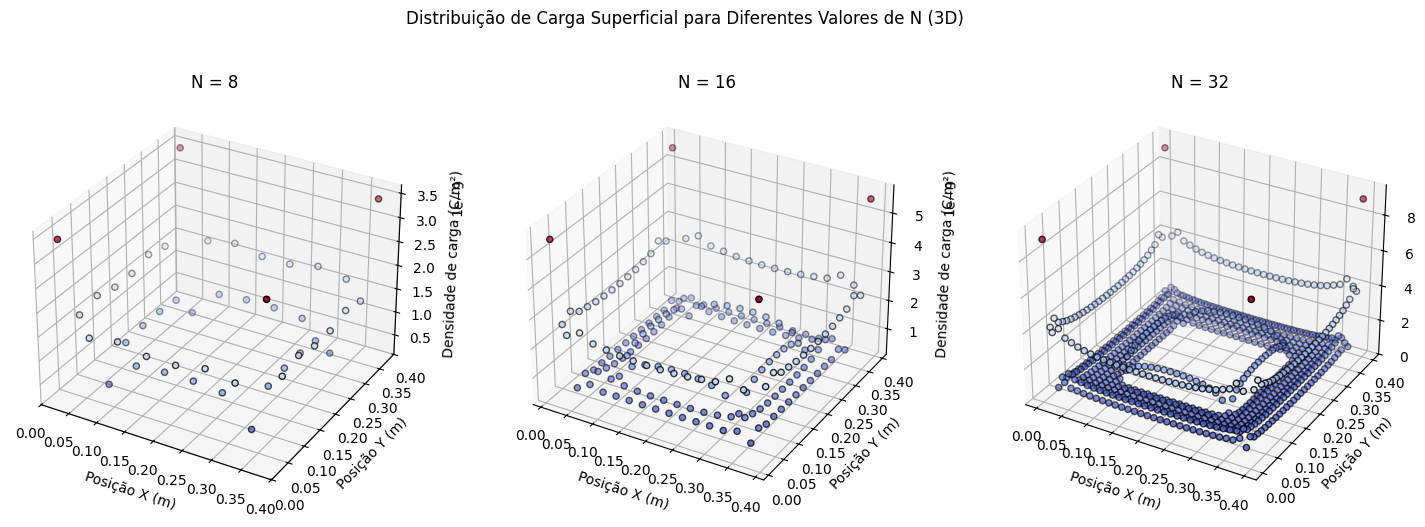

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definições do problema
L = 40e-2  # 40 cm convertido para metros
V0 = 10    # Potencial do anel em volts
Ns = [8, 16, 32]  # Diferentes valores de N para análise

eps0 = 8.854e-12  # Permissividade do espaço livre

# Criar gráficos para diferentes valores de N
fig = plt.figure(figsize=(18, 6))

for idx, N in enumerate(Ns):
    delta = L / N  # Tamanho de cada segmento

    # Criando as posições dos centros dos subdomínios
    subdomains = []
    for i in range(N):
        for j in range(N):
            x = (i + 0.5) * delta
            y = (j + 0.5) * delta
            # Verifica se o ponto está no anel
            if not (L/4 <= x <= 3*L/4 and L/4 <= y <= 3*L/4):
                subdomains.append((x, y))

    M = len(subdomains)  # Número real de subdomínios
    Z = np.zeros((M, M))
    V = np.full(M, V0)  # Vetor de tensões

    # Cálculo aproximado da matriz de impedância
    for i, (xi, yi) in enumerate(subdomains):
        for j, (xj, yj) in enumerate(subdomains):
            if i == j:
                Z[i, j] = delta**2 / (2 * np.pi * eps0 * delta)  # Autoimpedância
            else:
                rij = np.sqrt((xi - xj)**2 + (yi - yj)**2)
                Z[i, j] = delta**2 / (4 * np.pi * eps0 * rij)  # Aproximação

    # Resolver o sistema linear Z * sigma = V
    sigma = np.linalg.solve(Z, V)  # Distribuição de carga superficial

    # Plotar a distribuição de carga para cada N em 3D
    ax = fig.add_subplot(1, len(Ns), idx+1, projection='3d')
    x_vals = [x for x, y in subdomains]
    y_vals = [y for x, y in subdomains]
    ax.scatter(x_vals, y_vals, sigma, c=sigma, cmap='coolwarm', edgecolors='k')
    ax.set_title(f'N = {N}')
    ax.set_xlabel("Posição X (m)")
    ax.set_ylabel("Posição Y (m)")
    ax.set_zlabel("Densidade de carga (C/m²)")

plt.suptitle("Distribuição de Carga Superficial para Diferentes Valores de N (3D)")
plt.show()


### Outra forma de exibir em 3D:

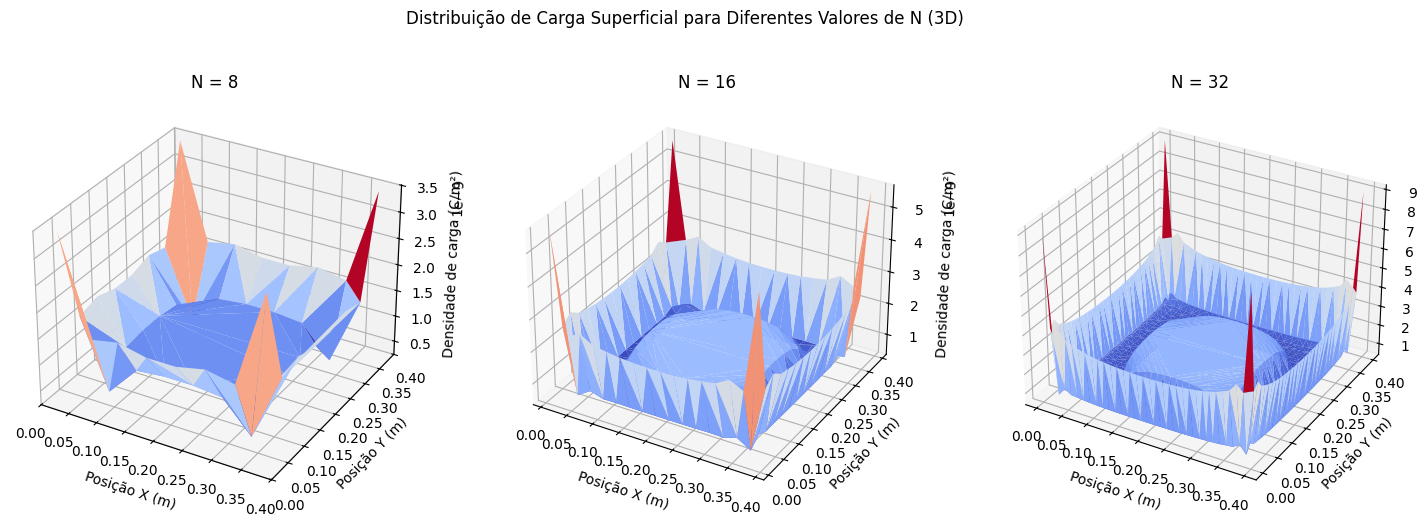

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definições do problema
L = 40e-2  # 40 cm convertido para metros
V0 = 10    # Potencial do anel em volts
Ns = [8, 16, 32]  # Diferentes valores de N para análise

eps0 = 8.854e-12  # Permissividade do espaço livre

# Criar gráficos para diferentes valores de N
fig = plt.figure(figsize=(18, 6))

for idx, N in enumerate(Ns):
    delta = L / N  # Tamanho de cada segmento

    # Criando as posições dos centros dos subdomínios
    subdomains = []
    for i in range(N):
        for j in range(N):
            x = (i + 0.5) * delta
            y = (j + 0.5) * delta
            # Verifica se o ponto está no anel
            if not (L/4 <= x <= 3*L/4 and L/4 <= y <= 3*L/4):
                subdomains.append((x, y))

    M = len(subdomains)  # Número real de subdomínios
    Z = np.zeros((M, M))
    V = np.full(M, V0)  # Vetor de tensões

    # Cálculo aproximado da matriz de impedância
    for i, (xi, yi) in enumerate(subdomains):
        for j, (xj, yj) in enumerate(subdomains):
            if i == j:
                Z[i, j] = delta**2 / (2 * np.pi * eps0 * delta)  # Autoimpedância
            else:
                rij = np.sqrt((xi - xj)**2 + (yi - yj)**2)
                Z[i, j] = delta**2 / (4 * np.pi * eps0 * rij)  # Aproximação

    # Resolver o sistema linear Z * sigma = V
    sigma = np.linalg.solve(Z, V)  # Distribuição de carga superficial

    # Criando matriz de valores para plotagem em 3D
    X = np.array([x for x, y in subdomains])
    Y = np.array([y for x, y in subdomains])
    Sigma = np.array(sigma)

    # Plotar a distribuição de carga para cada N como gráfico de superfície
    ax = fig.add_subplot(1, len(Ns), idx+1, projection='3d')
    ax.plot_trisurf(X, Y, Sigma, cmap='coolwarm', edgecolor='none')
    ax.set_title(f'N = {N}')
    ax.set_xlabel("Posição X (m)")
    ax.set_ylabel("Posição Y (m)")
    ax.set_zlabel("Densidade de carga (C/m²)")

plt.suptitle("Distribuição de Carga Superficial para Diferentes Valores de N (3D)")
plt.show()

## 5. 📉 Determine a carga total na placa para os diferentes valores de N acima e observe a sua convergência:

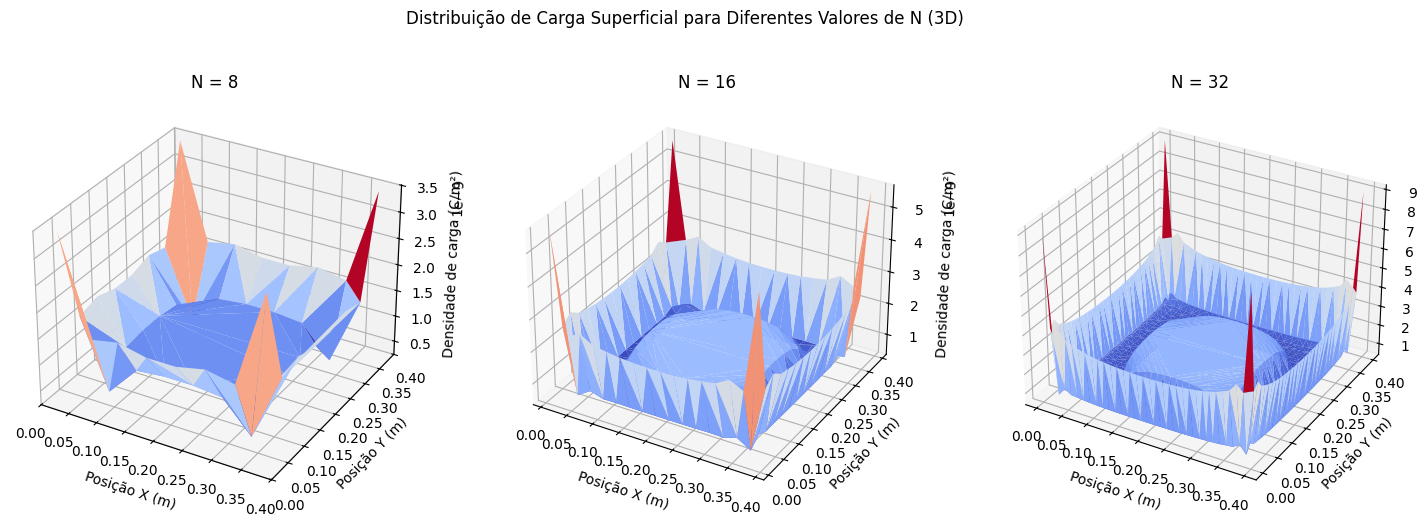

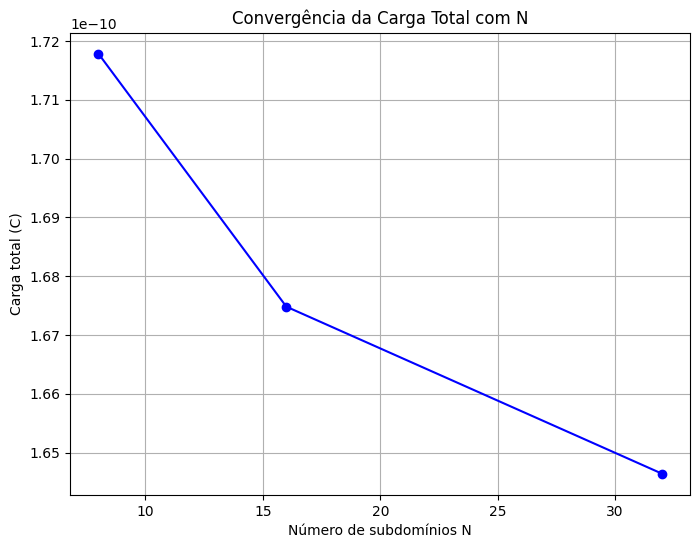

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definições do problema
L = 40e-2  # 40 cm convertido para metros
V0 = 10    # Potencial do anel em volts
Ns = [8, 16, 32]  # Diferentes valores de N para análise

eps0 = 8.854e-12  # Permissividade do espaço livre

# Criar gráficos para diferentes valores de N
fig = plt.figure(figsize=(18, 6))
carga_total = []  # Lista para armazenar cargas totais

for idx, N in enumerate(Ns):
    delta = L / N  # Tamanho de cada segmento

    # Criando as posições dos centros dos subdomínios
    subdomains = []
    for i in range(N):
        for j in range(N):
            x = (i + 0.5) * delta
            y = (j + 0.5) * delta
            # Verifica se o ponto está no anel
            if not (L/4 <= x <= 3*L/4 and L/4 <= y <= 3*L/4):
                subdomains.append((x, y))

    M = len(subdomains)  # Número real de subdomínios
    Z = np.zeros((M, M))
    V = np.full(M, V0)  # Vetor de tensões

    # Cálculo aproximado da matriz de impedância
    for i, (xi, yi) in enumerate(subdomains):
        for j, (xj, yj) in enumerate(subdomains):
            if i == j:
                Z[i, j] = delta**2 / (2 * np.pi * eps0 * delta)  # Autoimpedância
            else:
                rij = np.sqrt((xi - xj)**2 + (yi - yj)**2)
                Z[i, j] = delta**2 / (4 * np.pi * eps0 * rij)  # Aproximação

    # Resolver o sistema linear Z * sigma = V
    sigma = np.linalg.solve(Z, V)  # Distribuição de carga superficial

    # Calcular a carga total
    Q_total = np.sum(sigma * delta**2)  # Soma das cargas de todos os elementos
    carga_total.append(Q_total)

    # Criando matriz de valores para plotagem em 3D
    X = np.array([x for x, y in subdomains])
    Y = np.array([y for x, y in subdomains])
    Sigma = np.array(sigma)

    # Plotar a distribuição de carga para cada N como gráfico de superfície
    ax = fig.add_subplot(1, len(Ns), idx+1, projection='3d')
    ax.plot_trisurf(X, Y, Sigma, cmap='coolwarm', edgecolor='none')
    ax.set_title(f'N = {N}')
    ax.set_xlabel("Posição X (m)")
    ax.set_ylabel("Posição Y (m)")
    ax.set_zlabel("Densidade de carga (C/m²)")

plt.suptitle("Distribuição de Carga Superficial para Diferentes Valores de N (3D)")
plt.show()

# Plotando a convergência da carga total
plt.figure(figsize=(8, 6))
plt.plot(Ns, carga_total, marker='o', linestyle='-', color='b')
plt.xlabel("Número de subdomínios N")
plt.ylabel("Carga total (C)")
plt.title("Convergência da Carga Total com N")
plt.grid()
plt.show()

## 💡 Conclusão:

A aplicação do Método dos Momentos para determinar a distribuição superficial de carga em um anel metálico quadrado mostrou que a carga se concentra nas bordas internas e externas do anel, como esperado em problemas eletrostáticos envolvendo condutores finitos.

Ao aumentar o número de subdivisões N, a solução se torna mais precisa, pois a discretização mais refinada melhora a aproximação da carga distribuída. A convergência da carga total mostra que, a partir de um certo N, os valores tendem a estabilizar, indicando que a solução está próxima do resultado exato.

Além disso, os gráficos 3D permitem visualizar claramente a distribuição não uniforme da carga, com altas concentrações nos cantos e bordas do anel. Isso ocorre devido ao efeito de borda, um fenômeno característico em condutores finitos.

Este estudo confirma que o Método dos Momentos é uma técnica eficiente para resolver problemas de eletrostática envolvendo condutores de geometria complexa e que a escolha de N deve equilibrar precisão e custo computacional.